In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [33]:
img = cv2.imread("Image Segmentation Data\\flower_petals.jpg", -1)
cv2.imshow("Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
print(img.shape)

(313, 501, 3)


In [35]:
all_pixels = img.reshape((-1,3))
print(all_pixels.shape)

(156813, 3)


In [36]:
print(all_pixels.shape[0])

156813


In [38]:
dominant_colors = 5

km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
centers = km.cluster_centers_
print(centers)
centers = np.array(centers, dtype='uint8')
print(centers)

[[151.9591388   55.93688667 222.43601694]
 [ 81.45586141  77.15550207  92.5616313 ]
 [177.77122541 210.51036508 229.30097637]
 [181.44331444 125.269824    10.22190115]
 [ 30.78703107 137.73883284 228.07982161]]
[[151  55 222]
 [ 81  77  92]
 [177 210 229]
 [181 125  10]
 [ 30 137 228]]


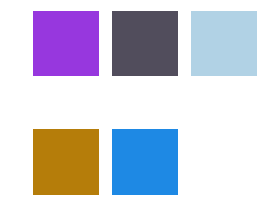

In [40]:
i = 1
plt.figure(0, figsize=(4,4))
colors = []

for curr in centers:
    plt.subplot(2,3,i)
    plt.axis("off")
    i += 1
    colors.append(curr)
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = curr
    plt.imshow(a)
    
plt.show()

In [41]:
new_img = np.zeros((all_pixels.shape[0],3), dtype='uint8')

In [42]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    

In [43]:
new_img = new_img.reshape((img.shape))
cv2.imshow("Original Image", img)
cv2.imshow("Image", new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()